In [25]:
import geopandas as gpd
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [26]:
Base_folder = "/Users/Daniel/Desktop/MSc Data Science/Dissertaton Project/Repo/Vis-EHR"

In [27]:
shapefile_folder = os.path.join(Base_folder, "Shapefile")
shapefilename1 = "msoa-ref-England-Scotland2011.geojson"
shapefile1 = os.path.join(shapefile_folder, shapefilename1)

shapefilename2 = "msoa-ref-Wales2011.geojson"
shapefile2 = os.path.join(shapefile_folder, shapefilename2)

shapefile1_df = gpd.read_file(shapefile1)
shapefile2_df = gpd.read_file(shapefile2)

<AxesSubplot:>

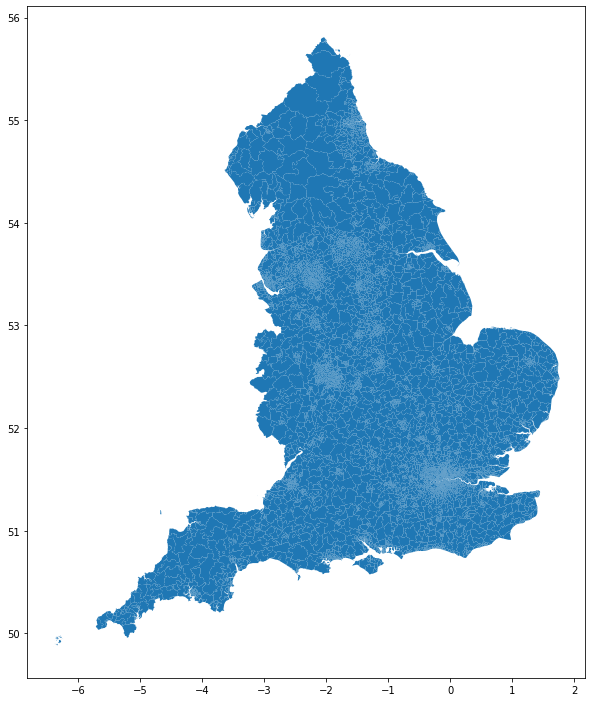

In [28]:
shapefile1_df.plot(figsize=(10, 15))

<AxesSubplot:>

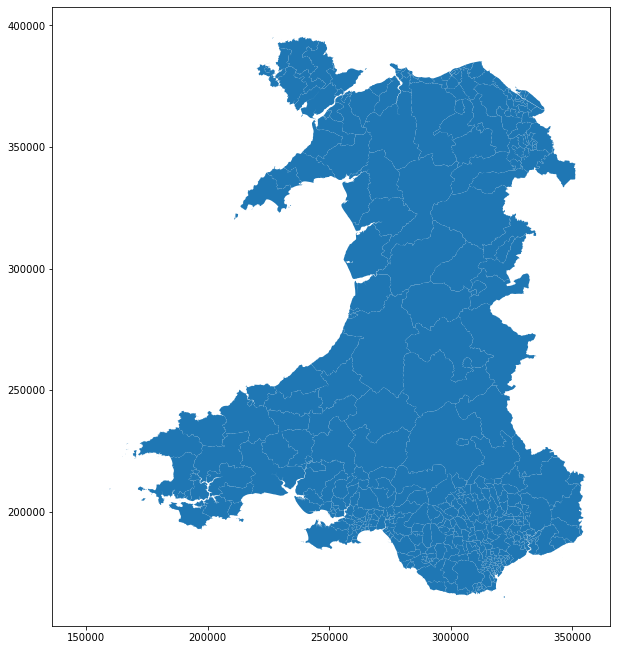

In [29]:
shapefile2_df.plot(figsize=(10, 15))

In [30]:
shapefile2_df.head()

,id,MSOA11_Code,msoa11_name,area_sq_km,local authority,x,y,geometry
0,msoa_wales_2011.1,W02000001,Isle of Anglesey 001,136.15,Sir Ynys Mon - Isle of Anglesey,238123.32,388169.99,"MULTIPOLYGON (((239006.203 395294.397, 238998...."
1,msoa_wales_2011.2,W02000002,Isle of Anglesey 002,120.68,Sir Ynys Mon - Isle of Anglesey,246434.62,384394.69,"MULTIPOLYGON (((247885.499 393637.102, 247871...."
2,msoa_wales_2011.3,W02000003,Isle of Anglesey 003,4.58,Sir Ynys Mon - Isle of Anglesey,224680.76,381904.63,"MULTIPOLYGON (((225339.198 383395.303, 225336...."
3,msoa_wales_2011.4,W02000004,Isle of Anglesey 004,74.59,Sir Ynys Mon - Isle of Anglesey,228678.51,382735.49,"MULTIPOLYGON (((231636.298 390401.688, 231631...."
4,msoa_wales_2011.5,W02000005,Isle of Anglesey 005,81.65,Sir Ynys Mon - Isle of Anglesey,256251.21,378258.04,"MULTIPOLYGON (((252010.602 384388.399, 252005...."


In [31]:
shapefile2_df.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [32]:
shapefile1_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
converted_shapefile2_df = shapefile2_df.to_crs(epsg=4326)

<AxesSubplot:>

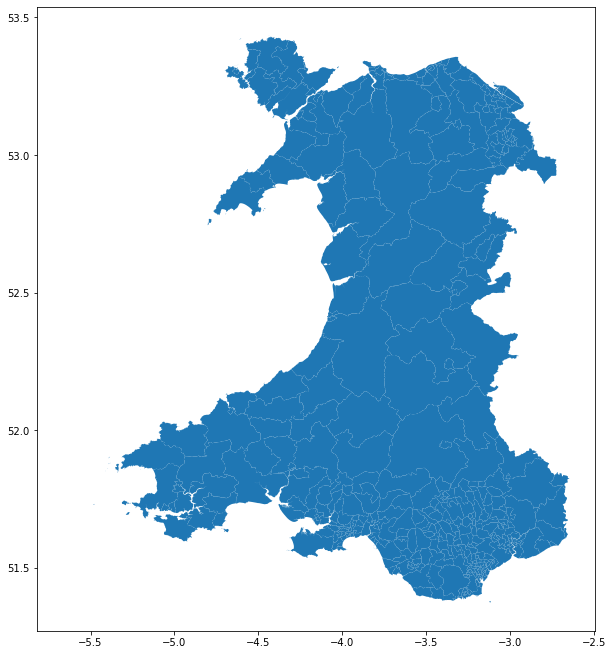

In [34]:
converted_shapefile2_df.plot(figsize=(10, 15))

In [35]:
shapefile1_df.head()

,code,geometry
0,E02000001,"POLYGON ((-0.09274 51.52139, -0.09453 51.52205..."
1,E02000002,"POLYGON ((0.14115 51.58054, 0.14180 51.58531, ..."
2,E02000003,"POLYGON ((0.14841 51.58075, 0.15105 51.58589, ..."
3,E02000004,"POLYGON ((0.19021 51.55268, 0.18475 51.55939, ..."
4,E02000005,"POLYGON ((0.15045 51.56561, 0.15441 51.56607, ..."


In [36]:
converted_shapefile2_df.head()

,id,MSOA11_Code,msoa11_name,area_sq_km,local authority,x,y,geometry
0,msoa_wales_2011.1,W02000001,Isle of Anglesey 001,136.15,Sir Ynys Mon - Isle of Anglesey,238123.32,388169.99,"MULTIPOLYGON (((-4.42468 53.42981, -4.42481 53..."
1,msoa_wales_2011.2,W02000002,Isle of Anglesey 002,120.68,Sir Ynys Mon - Isle of Anglesey,246434.62,384394.69,"MULTIPOLYGON (((-4.29035 53.41756, -4.29057 53..."
2,msoa_wales_2011.3,W02000003,Isle of Anglesey 003,4.58,Sir Ynys Mon - Isle of Anglesey,224680.76,381904.63,"MULTIPOLYGON (((-4.62358 53.31861, -4.62363 53..."
3,msoa_wales_2011.4,W02000004,Isle of Anglesey 004,74.59,Sir Ynys Mon - Isle of Anglesey,228678.51,382735.49,"MULTIPOLYGON (((-4.53288 53.38357, -4.53296 53..."
4,msoa_wales_2011.5,W02000005,Isle of Anglesey 005,81.65,Sir Ynys Mon - Isle of Anglesey,256251.21,378258.04,"MULTIPOLYGON (((-4.22400 53.33566, -4.22408 53..."


In [40]:
wales_msoa = converted_shapefile2_df.drop(columns=['id','msoa11_name', 'area_sq_km', 'local authority', 'x','y',])
wales_msoa2 = wales_msoa.rename(columns={'MSOA11_Code': 'code'})

In [41]:
wales_eng_scot_msoa = pd.concat([shapefile1_df, wales_msoa2], ignore_index=True)

In [42]:
(wales_eng_scot_msoa["code"].isna() == True).sum()

0

<AxesSubplot:>

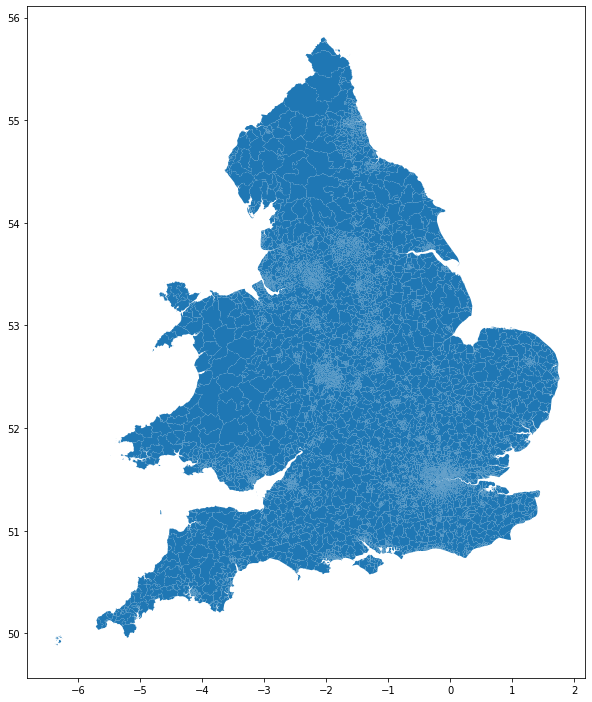

In [43]:
wales_eng_scot_msoa.plot(figsize=(10, 15))

In [44]:
wales_eng_scot_msoa.to_file("/Users/Daniel/Desktop/MSc Data Science/Dissertaton Project/Repo/Vis-EHR/Shapefile/MSOA_Wal_Eng_Scot.geojson", driver='GeoJSON')